In [75]:
import cv2
from matplotlib import pyplot as plt

In [76]:
img = cv2.imread("car.jpg")
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [77]:
print(img.shape)

(512, 512, 3)


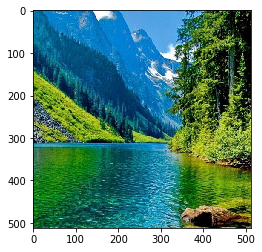

In [78]:
plt.imshow(img)
plt.show()

In [79]:
# Flatten each channel of the image

allpixels = img.reshape((512*512,3))
print(allpixels.shape)

(262144, 3)


In [80]:
from sklearn.cluster import KMeans

In [81]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)

In [82]:
km.fit(allpixels)
allpixels.shape

(262144, 3)

In [83]:
centers = km.cluster_centers_

In [84]:
import numpy as np
centers = np.array(centers,dtype='uint8')

In [85]:
print(centers.shape)
print(centers)

(4, 3)
[[ 16 113 155]
 [ 20  69  38]
 [111 177 210]
 [127 155  50]]


In [86]:
# Plot what all colors are these

####  So here we are basically going to extract the 4 most dominant colors from the image and display those colors

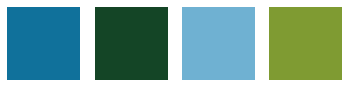

In [92]:
i = 1
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    #color swatch 
    
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()

In [93]:
print(km.labels_)
print(km.labels_.shape)

[2 0 0 ... 1 3 3]
(262144,)


### Segmenting Our original image

In [94]:
newimage = np.zeros((512*512,3),dtype='uint8')
newimage.shape

(262144, 3)

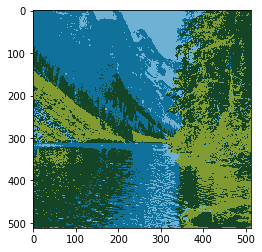

In [95]:
for i in range(newimage.shape[0]):
    newimage[i]=colors[km.labels_[i]]
    
newimage = newimage.reshape((512,512,3))
plt.imshow(newimage)
plt.show()
    